# Linear Regression

<font color="red"> <b> Due: Sep 24 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Heet Detroja </font>

# Introduction

In this Assignment we will implement two algorithms namely least square and least mean square for linear regression of the data. The data set used here is Appliances energy prediction which has more than one dependent variable 'Appliances' and 28 independent variables which will be used for linear regression.We preprocessed the data to check for any null values then we have explained and implemented least square and least mean squares code also visualized the predicted and the actual values of the regression,after which we have compared the two algorithms by calculating their RMSE values respectively.Finally, we have found the most and the least significant feature variables and observed the predicted values after removing them and plotted a residual plot for the dataset.

# Data

## A.Introduction of Data for Regression

The dataset used here for regression is appliances energy prediction dataset from the UCI machine learning repository.The dataset consists of 19735 data samples and 29 feature values,they are used to predict the energy consumption of appliances.The data samples were recorded for 4.5 months with time difference of 10 mins between each sample.The feature values of the data set are:
<br>
Date and time
<br>
Appliances energy consumption in Wh
<br>
Lights energy consumption in Wh
<br>
T1 = temperature in kitchen area in celsius
<br>
RH_1 = humidity in kitchen area in percentage
<br>
T2 = temperature in living room area in celsius
<br>
RH_2 = humidity in living room area in percentage
<br>
T3 = temperature in laundary room area in celsius
<br>
RH_3 = humidity in laundary room area in percentage
<br>
T4 = temperature in office room in celsius
<br>
RH_4 = humidity in office room in percentage
<br>
T5 = temperature in bathroom in celsius
<br>
RH_5 = humidity in bathroom in percentage
<br>
T6 = temperature outside the building (north side) in celsius
<br>
RH_6 = humidity outside the building (north side) in percentage
<br>
T7 = temperature in ironing room in celsius
<br>
RH_7 = humidity in ironing room in percentage
<br>
T8 = temperature in teenager room in celsius
<br>
RH_8 = humidity in teenager room in percentage
<br>
T9 = temperature in parents room in celsius
<br>
RH_9 = humidity in parents room in percentage
<br>
T_out = Temperature outside (from Chievres weather station) in degree Celsius
<br>
Press_mm_hg = Pressure (from Chievres weather station) in mm Hg
<br>
RH_out = Humidity outside (from Chievres weather station) in percentage
<br>
Wind speed =  (from Chievres weather station) in m/s
<br>
Visibility = (from Chievres weather station) in km
<br>
Tdewpoint = (from Chievres weather station) degree celsius
<br>
rv1 = Random variable 1
<br>
rv2 = Random variable 2
<br>
the two random variables are taken for testing the model and to filter out non predictive attributes.
The dataset and information is available on UCI machine learning repository.


## B.Reading the Data

Reading the .csv file for processing the data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

dataset=pd.read_csv('energydata_complete.csv')

## C.Preprocessing the Data

Taking the mean of temperature and humidity for all the rooms to plot it on graph.

In [2]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('energydata_complete.csv')
col1 = dataset.loc[:,'T1']
col2 = dataset.loc[:,'T2']
col3 = dataset.loc[:,'T3']
col4 = dataset.loc[:,'T4']
col5 = dataset.loc[:,'T5']
col6 = dataset.loc[:,'T6']
col7 = dataset.loc[:,'T7']
col8 = dataset.loc[:,'T8']
col9 = dataset.loc[:,'T9']
tempmean = (col1+col2+col3+col4+col5+col6+col7+col8+col9)/9
col1 = dataset.loc[:,'RH_1']
col2 = dataset.loc[:,'RH_2']
col3 = dataset.loc[:,'RH_3']
col4 = dataset.loc[:,'RH_4']
col5 = dataset.loc[:,'RH_5']
col6 = dataset.loc[:,'RH_6']
col7 = dataset.loc[:,'RH_7']
col8 = dataset.loc[:,'RH_8']
col9 = dataset.loc[:,'RH_9']
hummean = (col1+col2+col3+col4+col5+col6+col7+col8+col9)/9


Checking for missing data

In [3]:
dataset.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

## D.Visualization of Data and Preliminary Observations

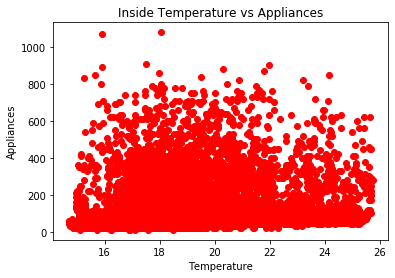

In [4]:
plt.scatter(tempmean,dataset["Appliances"],color='red')
plt.title("Inside Temperature vs Appliances")
plt.xlabel("Temperature")
plt.ylabel("Appliances")
plt.show()

### Inside Temperature vs Appliances
This scatter plots shows the effects of the temperatures of all the rooms on the appliances energy consumption,as we see few observations at 16 degree celcius have energy consumption as high as 1000 Wh this may be due to use of appliances like air condition to keep the low temperatures. 

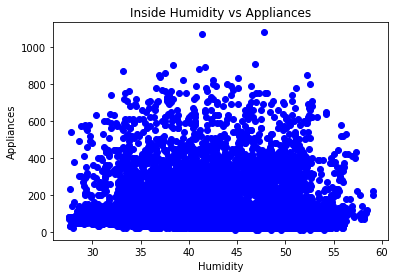

In [5]:
plt.scatter(hummean,dataset["Appliances"],color='blue')
plt.title("Inside Humidity vs Appliances")
plt.xlabel("Humidity")
plt.ylabel("Appliances")
plt.show()

### Inside Humidity vs Appliances
This scatter plots shows the effects of the humidity of all the rooms on the appliances energy consumption,as we see with humidity the appliance usage increases at 40 - 45 %. 


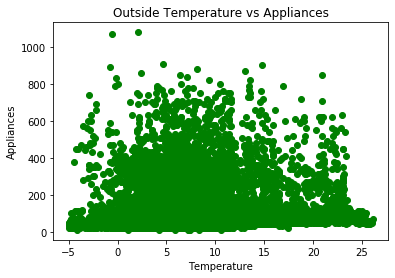

In [6]:
plt.scatter(dataset["T_out"],dataset["Appliances"],color='green')
plt.title("Outside Temperature vs Appliances")
plt.xlabel("Temperature")
plt.ylabel("Appliances")
plt.show()

### Outside Temperature vs Appliances
This scatter plots shows the effects of the outside temperature on the appliances energy consumption,as we see few observations at low temp have energy consumption as high as 1000 Wh this may be due to use of heater in low temperatures. 

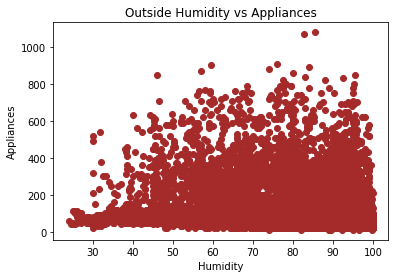

In [7]:
plt.scatter(dataset["RH_out"],dataset["Appliances"],color='brown')
plt.title("Outside Humidity vs Appliances")
plt.xlabel("Humidity")
plt.ylabel("Appliances")
plt.show()

### Outside Humidity vs Appliances
This scatter plots shows the effects of outside humidity on the appliances energy consumption,as we see with the increase in humidity the energy usage increases to keep the inside humidity and temperature at desired condition. 

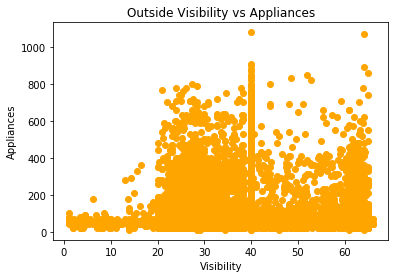

In [8]:
plt.scatter(dataset["Visibility"],dataset["Appliances"],color='orange')
plt.title("Outside Visibility vs Appliances")
plt.xlabel("Visibility")
plt.ylabel("Appliances")
plt.show()

### Outside Visibility vs Appliances
This scatter plots shows the effects of outside visibility on the appliances energy consumption,as we see with the visibilty changes with day and night the energy usage changes as lights will be used more during night and during day it would be less. 

# Method

## A. Review

A linear model will make a prediction by computing the weighted sum of input features and a bias term.
We can represent a linear combination of input x and weights w as:
    
$$
\begin{align*}
  f(x; w) &= w^\top x = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align*}
$$

#### Least Squares 

In Least Squares, we take the distance between actual and predicted values ,square them and calculate the sum of those values.Here we try to minimize the error function of the linear model, which gives us the following equation for least squares:

$$ w = { (X^\top X)^{-1} (X ^\top t)} $$

where, X is the input matrix of N*D dimension
<br>
t = matrix of target values
<br>
w = matrix of weights

#### Least Mean Squares

In Least Mean Squares, we do not train the entire data available together , rather it follows online learning process.Here we calculate the weights after each iteration and make a new estimation based on the previous calculation.LMS is represented as:

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla E_k.
$$

where, k = number of steps
<br>
𝐸𝑘= error rate for k samples 
<br>
𝛼 = learning rate
<br>

## B.Explanation along with the Code

In [9]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """
    

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

Here we will implement least square and least mean square algorithms. A super class is implemented here having a base class BaseModel having two abstract methods train and use.Next the LinearModel class is implemented inheriting BaseModel class, it has a contructor which initializes the weight to None. The class has a _check_matrix fuction which will check if the passed matrix is 2 dimensional and another function add_ones which adds a bias column to our matrix of ones.LinearModel class also has two abstract methods from its parent the BaseModel which are train and use but are not defined over here.

### Least Squares

In [10]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X=np.hstack((np.ones((X.shape[0], 1)), X))
        self.w = np.linalg.solve(X.T @ X, X.T @ T) 
    
    def use(self, X):
        X=np.hstack((np.ones((X.shape[0], 1)), X))
        y = X @ self.w
        return y

The LinearRegress class here is inheriting the LinearModel class, this LinearRegress class will implement the least squares algorithm on our data.It has a constructor which calls the parent class constructor to set the weights to none.Here we have defined the two train and use methods which were declared in the parent class.
In the train method we accept two parameters our 2 dimensional matix of dataset and the target vector, we then simply add a column bias of one to our input matrix and then calculate the weight by using np.linalg.solve method.
In the use method we return the matrix of predicted values and the dot product of weight matrix calculated in the train method.

### Least Mean Squares

In [11]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for x, t in zip(X, T):
            self.train_step(x, t)
    
    def train_step(self, x, t):
            x=np.append(1, x).reshape(-1,1)
            if self.w is None:
                self.w = np.zeros((x.shape[0],1))
            self.w -=self.alpha*(self.w.T@x-t)*x 
        # apply the current model to data X
    def use(self, X):
        X=np.hstack((np.ones((X.shape[0], 1)), X)).T
        Y = X.T @ self.w
        return Y
        

The LMS class is used here to implement the LMS algorithm on our dataset. LMS class also inherits the LinearModel class, same as our LinearRegress class we have a constuctor here which calls the parent class also we have a alpha variable which is the learning rate which we will need to pass while calling the class.
In our train method here we are calling the train_step method to train step by step on our dataset and give the predicted output of entire training here.
In our train_step method we will calulate the weights at each step of the training by using the LMS formula,this method will return the weights after each step of training.
The use method here is similar to LinearRegress method where we will get the dot product of final weights and the given data of dataset to get our predicted values.

### Usage Examples

In [12]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

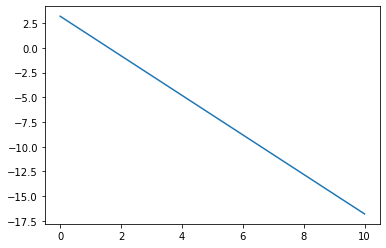

In [13]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

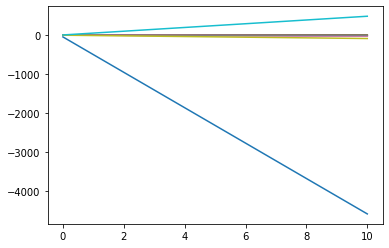

In [14]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

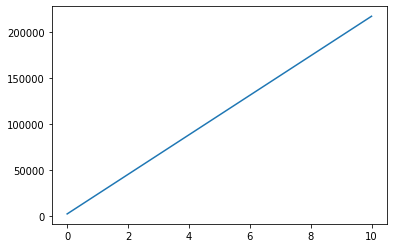

In [15]:
lms.train(X, T)
plt.plot(lms.use(X))

## C.Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [16]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# Experiments

## A.Description along with the Code and Visualizing the data

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
dataset=pd.read_csv('energydata_complete.csv')

Importing the dataset using pandas and dividing the dataset into d1 and d2 with d1 having the target variable and d2 having other features.

In [18]:
d1=dataset.Appliances.values
d2=dataset.drop(['date','Appliances','rv1','rv2','Press_mm_hg'],axis=1).values

Dividing the dataset into target feature and other features and dropping irrelevant feature which make less impact or no impact on the prediction.Also taking the dataset in dheat to plot the correltion further .

In [19]:
a=d1.shape[0]*20//100
t=d1.shape[0]
train_y = d1[a:t]
test_y = d1[0:a]
b=d2.shape[0]*20//100
t1=d2.shape[0]
train_x = d2[b:t1]
test_x = d2[0:b]

Here we divide the dataset into training and testing with 80% data in training and remaining 20% data in testing.

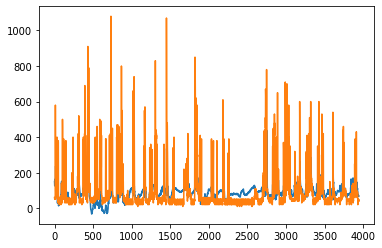

In [20]:
ls = LinearRegress()

ls.train(train_x, train_y)
r=ls.use(test_x)
plt.plot(r)
plt.plot(test_y)
plt.show()

In [21]:
rmsels=np.sqrt(np.mean((r.T -  test_y)**2))/dataset.shape[0]
rmsels

0.0057713920907783165

Here we call the ls function with out training dataset and target value which gives us the test_x predicted values and have plotted it with the test_y values . We can see the plot is fitting the data where the target values i.e the appliances have same enery consumption which is mostly around 30 to 200.

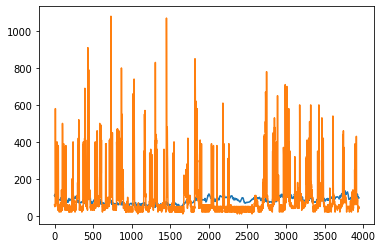

In [22]:
lms = LMS(0.000001)
lms.train(train_x, train_y)
r1=lms.use(test_x)
plt.plot(r1)    
plt.plot(test_y)

In [23]:
rmselms=np.sqrt(np.mean((r1.T -  test_y)**2))/dataset.shape[0]
rmselms

0.006000135936858289

Here we call the lms function with out training dataset and target value which gives us the test_x predicted values and have plotted it in step wise as the lms algorithm trains data in steps, along with the test_y values . We can see the plot will finall fit the data where the target values i.e the appliances have same enery consumption which is mostly around 30 to 200.This here is done in steps by using the learning rate and finally predict the best fit for appliances energy consumption.

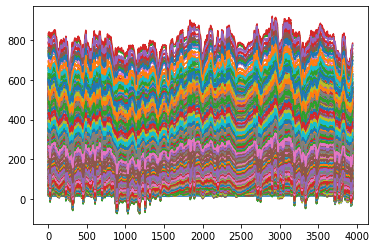

In [24]:
lms = LMS(0.00001)
for x, t in zip(train_x, train_y):
    lms.train_step(x,t)
    plt.plot(lms.use(test_x))

Here we call the lms step function to train our dataset to get the predicted values after each step.

## C. Analysis and comparison of algorithm

Comparison between the two algorithms shows us that LS plots the graph of predicted values with entire training dataset while LMS plots the graph training gradually step by step on individual features from the dataset.Thus,LMS is used for online learning where step by step training is required.
The least square method is computationally expensive as the calculations include matrix transpose and multiplication however it takes less time to train the model here while the least square method can be computationally much more efficient but the trainig time required for LMS is much more than LS.Weight values are updated after each step in lms step algrithm.<br>
For analysis of ls and lms algorithms, we can show the rmse value for both ls and lms algorithms which comes out to be 0.005771 and 0.006000 respectively. This shows that our data is overfitting the model as and ideal value must be close to zero.

# Extra Credit

### what is the most and least significant features for your data.
### what are the consequences if you remove those features from the model? (Show your work!)
 
    


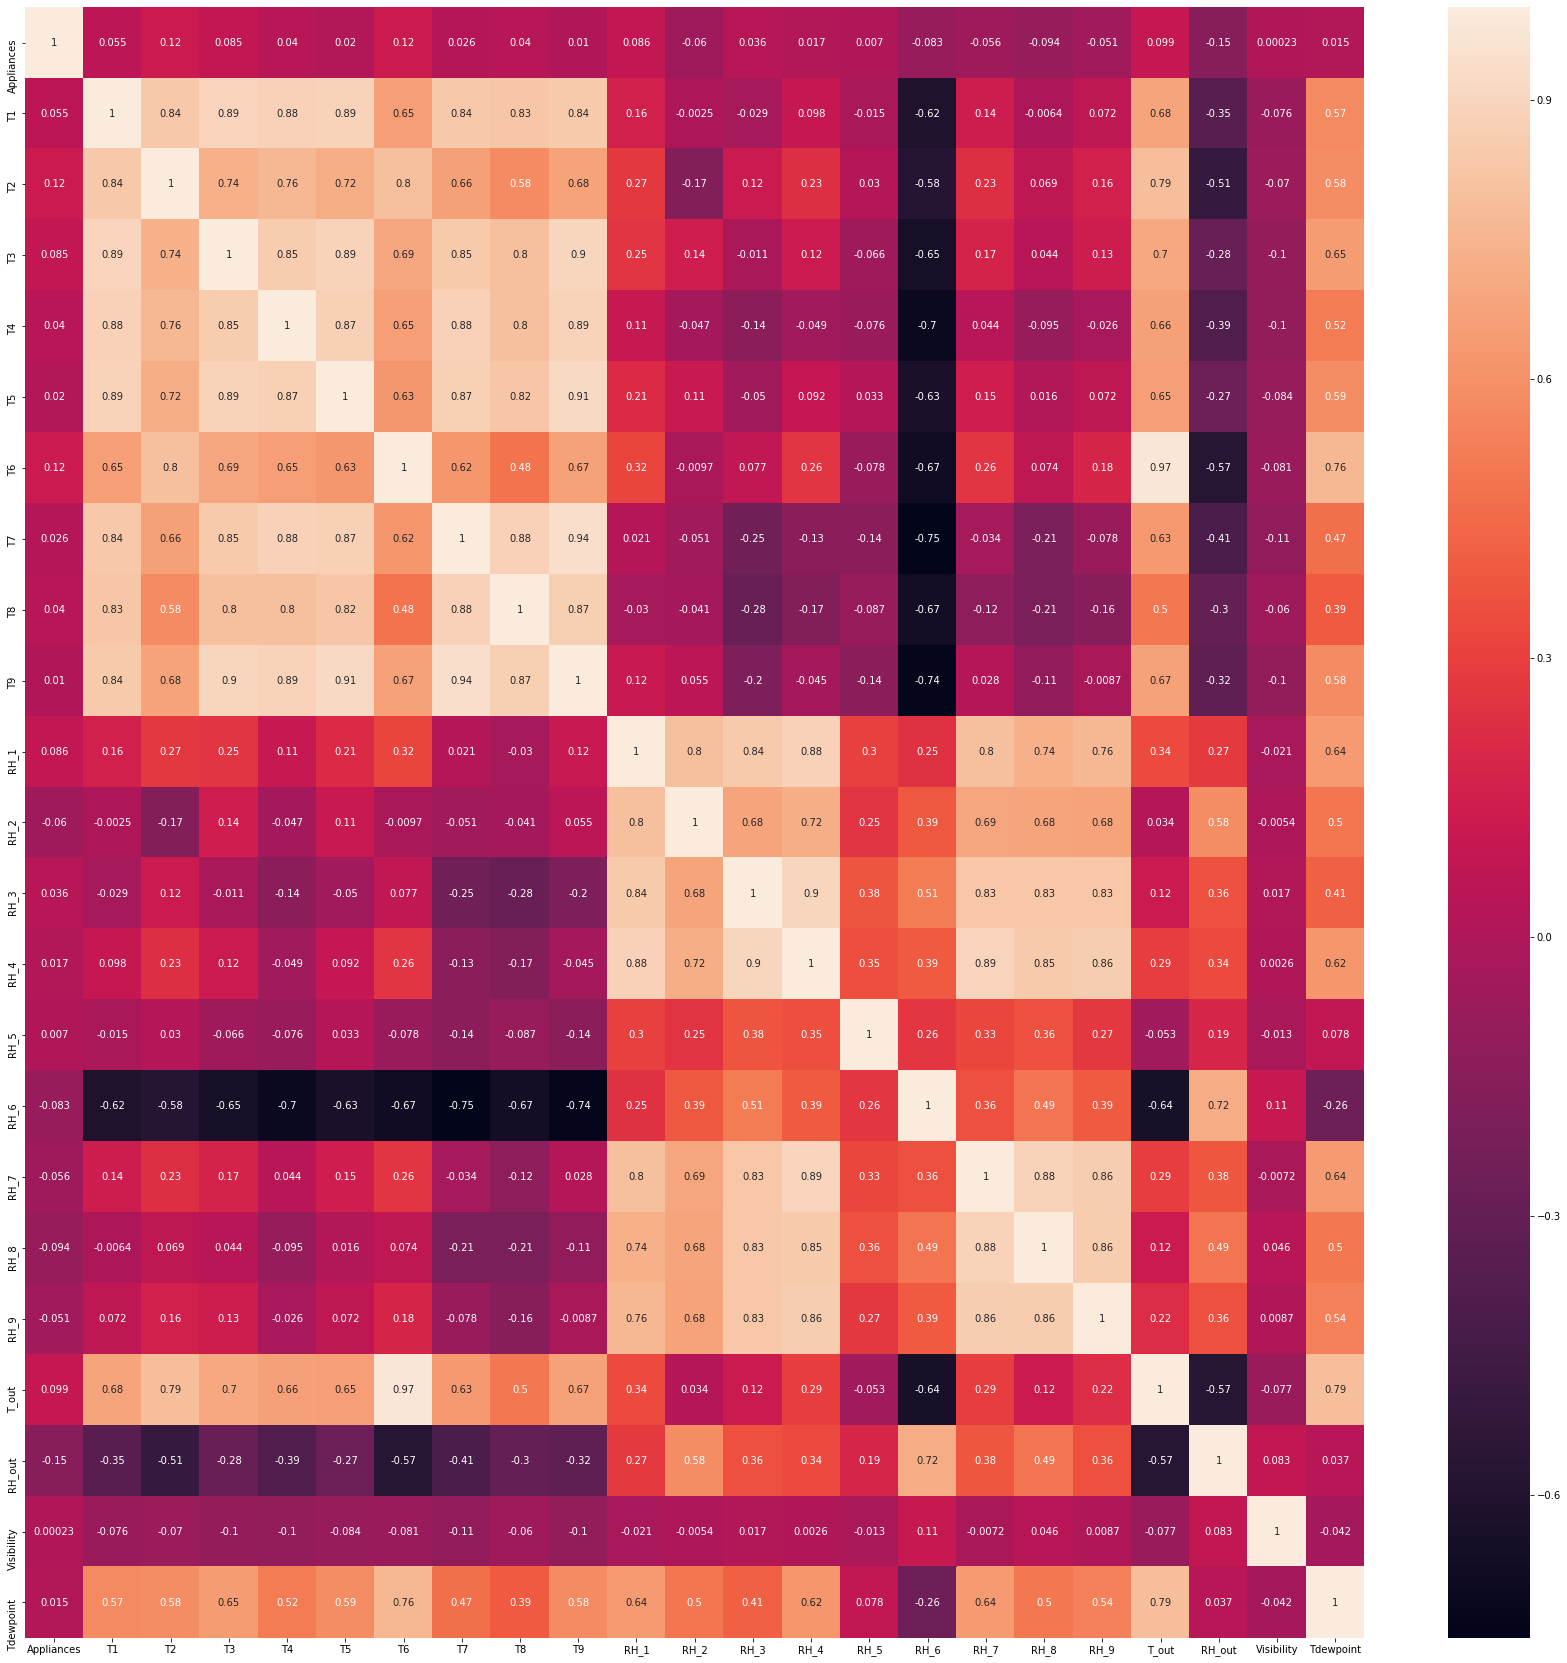

In [25]:
plt.figure(figsize=(30,30))
features=['Appliances','T1','T2','T3','T4','T5','T6','T7','T8','T9','RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','T_out','RH_out','Visibility','Tdewpoint']
sb.heatmap(dataset[features].corr(),annot=True)


##### 1.Looking at the heat map we can see that 'lights' feature is most significant to the target feature 'Applications'.

In [26]:
d3=dataset.drop(['date','Appliances','lights'],axis=1).values

In [27]:
a=d1.shape[0]*20//100
t=d1.shape[0]
train_ym = d1[a:t]
test_ym = d1[0:a]
b=d3.shape[0]*20//100
t1=d3.shape[0]
train_xm = d3[b:t1]
test_xm = d3[0:b]

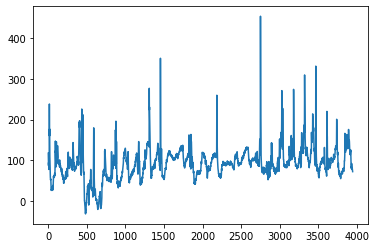

In [29]:
ls = LinearRegress()

ls.train(train_xm, train_ym)
most=ls.use(test_xm)
plt.plot(most)
plt.show()   

In [30]:
rmsemost=np.sqrt(np.mean((most.T -  test_y)**2))/dataset.shape[0]
rmsemost

0.005899872719066433

In [31]:
rmsels

0.0057713920907783165

As lights is the most significant feature of our dataset on the target value Appliances we can see a difference in the rmse value.

###### 2.Looking at the heat map we can see that 'Visibility' feature is least significant to the target feature 'Applications'.

In [32]:
d4=dataset.drop(['date','Appliances','Visibility'],axis=1).values

In [33]:
a=d1.shape[0]*20//100
t=d1.shape[0]
train_yl = d1[a:t]
test_yl = d1[0:a]
b=d4.shape[0]*20//100
t1=d4.shape[0]
train_xl = d4[b:t1]
test_xl = d4[0:b]

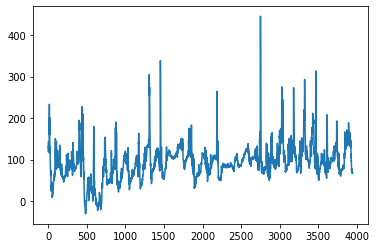

In [34]:
ls = LinearRegress()

ls.train(train_xl, train_yl)
least=ls.use(test_xl)
plt.plot(least)
plt.show()   

In [35]:
rmseleast=np.sqrt(np.mean((least.T -  test_y)**2))/dataset.shape[0]
rmseleast

0.005772547757985591

In [36]:
rmsels

0.0057713920907783165

As Visibility is the least significant feature of our dataset on the target value Appliances we can see that the difference in the rmse value is negligible.

### produce residual plots and observe the patterns for the goodness of fit   

#### Residual plot for Linear Regression

In [37]:
import statsmodels.formula.api as smf
regmost = smf.ols('Appliances ~ T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + RH_1 + RH_2 + RH_3 + RH_4 + RH_5 + RH_6 + RH_7 + RH_8 + RH_9 + T_out + RH_out + T7 + Windspeed + Visibility + Tdewpoint', data=dataset).fit()

In [38]:
pred_valm = regmost.fittedvalues.copy()
true_valm = dataset['Appliances'].values.copy()
residualm = true_valm - pred_valm

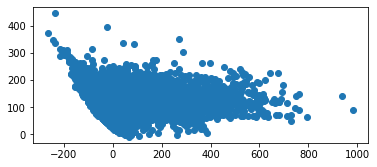

In [39]:
fig, axm = plt.subplots(figsize=(6,2.5))
_ = axm.scatter(residualm, pred_valm)

This residual plot show predicted values after removing the most significant feature i.e lights

In [40]:
regleast = smf.ols('Appliances ~ lights + T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + RH_1 + RH_2 + RH_3 + RH_4 + RH_5 + RH_6 + RH_7 + RH_8 + RH_9 + T_out + RH_out + T7 + Windspeed + Tdewpoint', data=dataset).fit()

In [41]:
pred_vall = regleast.fittedvalues.copy()
true_vall = dataset['Appliances'].values.copy()
residuall = true_vall - pred_vall

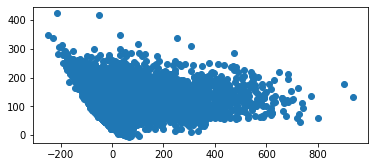

In [42]:
fig, axl = plt.subplots(figsize=(6,2.5))
_ = axl.scatter(residuall, pred_vall)

This residual plot show predicted values after removing the least significant feature i.e Visibility

# Conclusions

I have learned about linear regression in this assignment through two algorithms namely least squares and least mean squares and how it works on a dataset this big,also which features affect the dataset most and least, what are the changes in the predicted values if they are removed. 
While implementing the assignment challenges faced were understanding the working of the LS and LMS algorithm and work the algorithms with the dataset.

# References

[1] https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction
<br>
[2] Professor's Linear Model Notebook : https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Model.ipynb
<br>
[3] Professor's Forest Fire Notebook : https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/wb/ForestFire.ipynb
<br>
[4] Sand, M. (2019, April 24). Appliances Energy Prediction, https://medium.com/@sand.mayur/appliances-energy-prediction-2562af6ad3d9
[5] Zhiyzuo. (2018, May 1). Linear Regression Diagnostic in Python with StatsModels, https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/